In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')


# Get the Test Data 

In [2]:
test_df = pd.read_csv("../datasets/attribute_set/in_shop_attr/test_in_shop_partitioned.csv", index_col=0) 
test_df.shape 

(4441, 350)

# Models 
## Model 2: Efficient Net

In [3]:
import tensorflow as tf 

model_2_loaded = tf.keras.models.load_model("../trained_models/IN_SHOP_Models/model_2_efficient_net.h5") 

In [4]:
from helpers import predict 

y_hats = predict(test_df.iloc[:, 0], model_2_loaded)

100 th iteration. You have 4441 inputs. 
200 th iteration. You have 4441 inputs. 
300 th iteration. You have 4441 inputs. 
400 th iteration. You have 4441 inputs. 
500 th iteration. You have 4441 inputs. 
600 th iteration. You have 4441 inputs. 
700 th iteration. You have 4441 inputs. 
800 th iteration. You have 4441 inputs. 
900 th iteration. You have 4441 inputs. 
1000 th iteration. You have 4441 inputs. 
1100 th iteration. You have 4441 inputs. 
1200 th iteration. You have 4441 inputs. 
1300 th iteration. You have 4441 inputs. 
1400 th iteration. You have 4441 inputs. 
1500 th iteration. You have 4441 inputs. 
1600 th iteration. You have 4441 inputs. 
1700 th iteration. You have 4441 inputs. 
1800 th iteration. You have 4441 inputs. 
1900 th iteration. You have 4441 inputs. 
2000 th iteration. You have 4441 inputs. 
2100 th iteration. You have 4441 inputs. 
2200 th iteration. You have 4441 inputs. 
2300 th iteration. You have 4441 inputs. 
2400 th iteration. You have 4441 inputs. 
2

In [5]:
from helpers import evaluate_img, show_image
threshold = 0.70 

In [6]:
import numpy as np 

y_hats = np.array(y_hats).squeeze()

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

copy_y_hats = y_hats.copy() 
copy_y_hats[copy_y_hats >= threshold] = 1
copy_y_hats[copy_y_hats < threshold] = 0 
recall_score(test_df.iloc[:, 3:].to_numpy(), copy_y_hats, average="weighted")

0.171693280413513

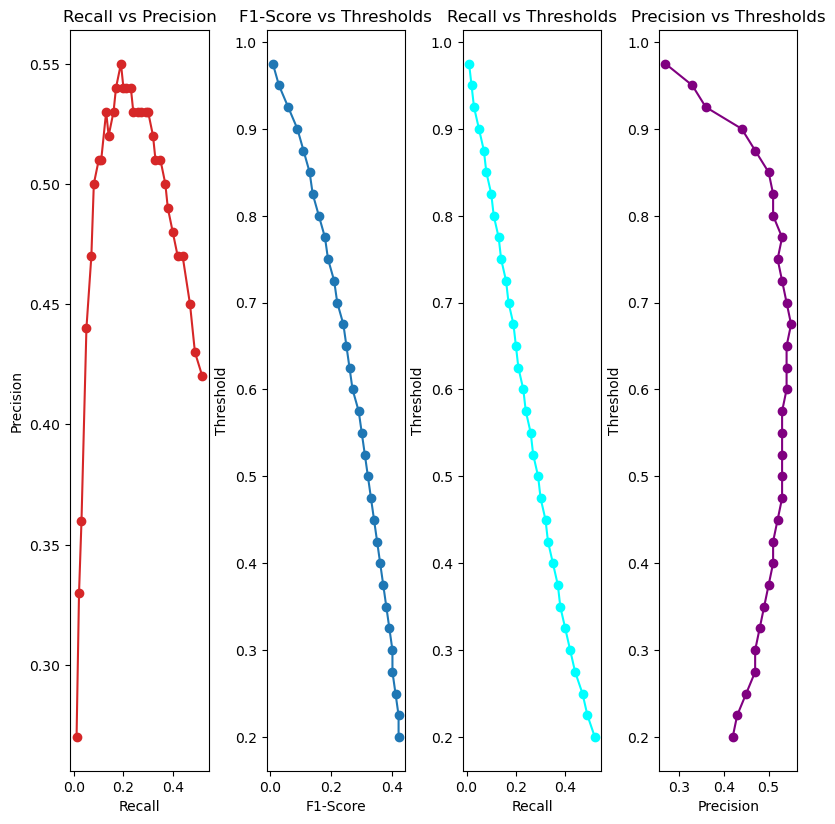

In [8]:
from helpers import plot_recall_precision_curve
res = plot_recall_precision_curve(y_hats.copy(), test_df.iloc[:, 3:].to_numpy())
del res 

In [9]:
col_names = pd.read_csv("../datasets/attribute_set/in_shop_attr/in_shop_data_all.csv").columns[4:]

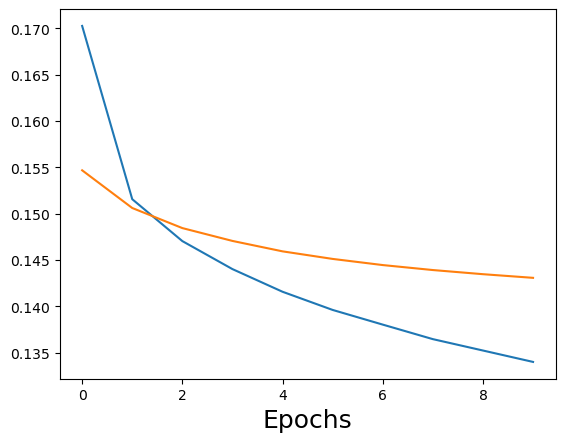

In [10]:
results_df = pd.read_csv("../trained_models/IN_SHOP_Models/model_2_efficient_net_step3.csv", index_col=0)

import matplotlib.pyplot as plt 

plt.plot(results_df.index.to_list(), results_df.loss)
plt.plot(results_df.index.to_list(), results_df.val_loss)
plt.xlabel("Epochs", fontsize=18)
plt.show() 

## Model 2: Efficient Net - Fine Tuned 

In [11]:
model_2_fine_tuned_loaded = tf.keras.models.load_model("../trained_models/IN_SHOP_Models/model_2_efficient_net.h5") 

In [14]:
y_hats_fine_tuned = predict(test_df.iloc[:, 0], model_2_fine_tuned_loaded)

100 th iteration. You have 4441 inputs. 
200 th iteration. You have 4441 inputs. 
300 th iteration. You have 4441 inputs. 
400 th iteration. You have 4441 inputs. 
500 th iteration. You have 4441 inputs. 
600 th iteration. You have 4441 inputs. 
700 th iteration. You have 4441 inputs. 
800 th iteration. You have 4441 inputs. 
900 th iteration. You have 4441 inputs. 
1000 th iteration. You have 4441 inputs. 
1100 th iteration. You have 4441 inputs. 
1200 th iteration. You have 4441 inputs. 
1300 th iteration. You have 4441 inputs. 
1400 th iteration. You have 4441 inputs. 
1500 th iteration. You have 4441 inputs. 
1600 th iteration. You have 4441 inputs. 
1700 th iteration. You have 4441 inputs. 
1800 th iteration. You have 4441 inputs. 
1900 th iteration. You have 4441 inputs. 
2000 th iteration. You have 4441 inputs. 
2100 th iteration. You have 4441 inputs. 
2200 th iteration. You have 4441 inputs. 
2300 th iteration. You have 4441 inputs. 
2400 th iteration. You have 4441 inputs. 
2

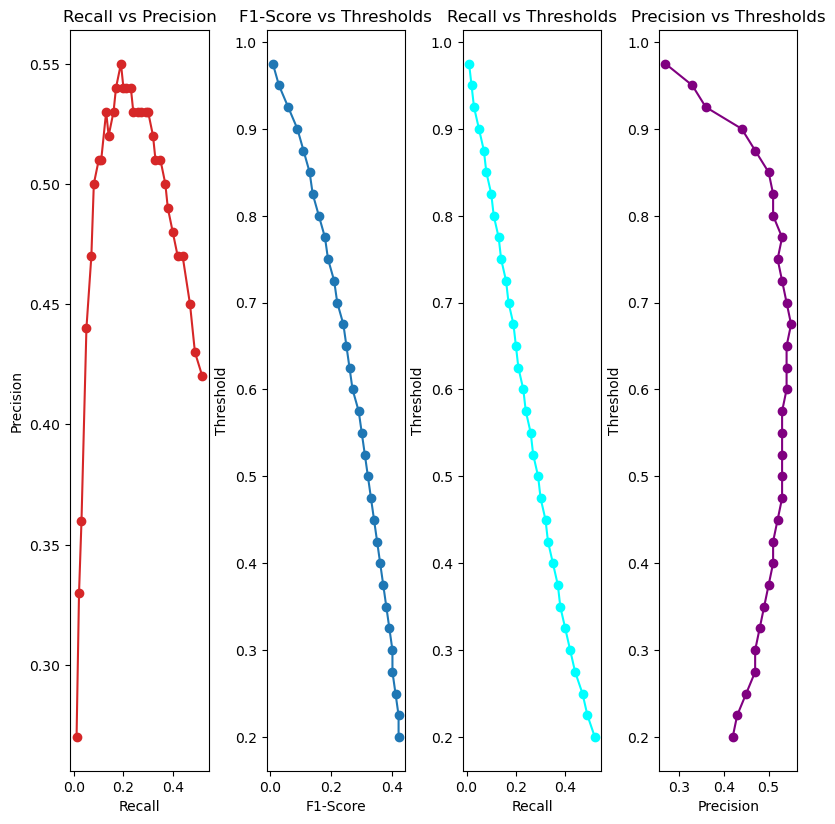

In [15]:
plot_recall_precision_curve(np.array(y_hats_fine_tuned).squeeze(), test_df.iloc[:, 3:].to_numpy())

1/1 [==============================] - 0s 46ms/step


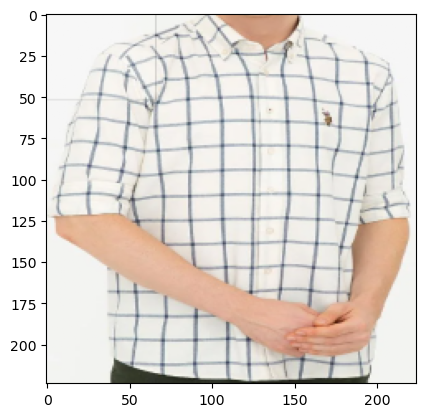

In [49]:
path = "../datasets/demos/uspa_sq.PNG"
res = evaluate_img(path, model=model_2_loaded, columns=col_names, threshold=threshold)
show_image(path)

In [50]:
res[res.values == 1]

0_lightweight     1.0
2_woven           1.0
4_cotton          1.0
9_print           1.0
12_classic        1.0
33_pocket         1.0
53_patch          1.0
63_hirt           1.0
92_button         1.0
96_button-down    1.0
104_down          1.0
184_plaid         1.0
198_light         1.0
317_line          1.0
dtype: float32

1/1 [==============================] - 0s 44ms/step


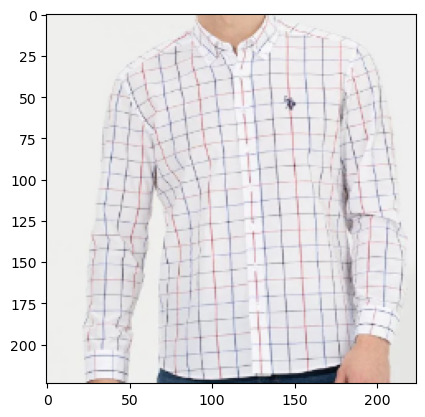

In [51]:
path = "../datasets/demos/uspa_sq2.PNG"
res2= evaluate_img(path, model=model_2_loaded, columns=col_names, threshold=threshold)
show_image(path)

In [52]:
res2[res2.values == 1]

0_lightweight    1.0
2_woven          1.0
4_cotton         1.0
12_classic       1.0
33_pocket        1.0
53_patch         1.0
63_hirt          1.0
92_button        1.0
184_plaid        1.0
198_light        1.0
dtype: float32

1/1 [==============================] - 0s 45ms/step


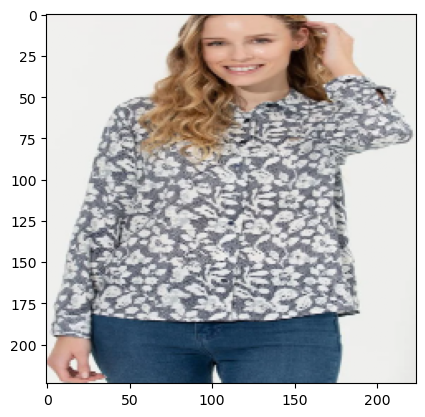

In [61]:
path = "../datasets/demos/floral.PNG"
res3 = evaluate_img(path, model=model_2_loaded, columns=col_names, threshold=0.8)
show_image(path)

In [62]:
res3[res3.values == 1]

4_cotton     1.0
9_print      1.0
198_light    1.0
dtype: float32